<a href="https://colab.research.google.com/github/BhavikBuchke/Cisco-Data-science-program/blob/main/Data%20visualization/Continent%20Populations%20Project/Continent%20populations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World population distribution

This dataset contains the `population` for each world `region` from 1800 through 2100 (projected).

The four regions are defined by Gapminder.org. The regions are Africa, Asia, Europe, and Americas.

This csv also contains global data (`region` is 'world') and other indicators including `life_expectancy`, `child_mortality` rates (per 1000), average number of `babies_per_woman`, and average `income_per_person` (in adjusted USD). See the README for details.

In [3]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'world-indicators.csv'.

from google.colab import files
uploaded = files.upload()

Saving world-indicators.csv to world-indicators (1).csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

indicators = pd.read_csv('world-indicators.csv')
indicators

,year,region,population,life_expectancy,child_mortality,babies_per_woman,income_per_person
0,1800,africa,81209567,30.091575,443.51,6.58,437.699298
1,1801,africa,81313551,30.016479,443.47,6.58,437.322912
2,1802,africa,81418900,30.019117,443.44,6.58,436.949999
3,1803,africa,81525621,30.099188,443.41,6.58,436.501460
4,1804,africa,81633731,30.101720,443.37,6.58,436.033849
...,...,...,...,...,...,...,...
1500,2096,world,10225850874,83.170480,12.00,1.81,43370.546400
1501,2097,world,10215549310,83.280416,11.00,1.81,43731.659780
1502,2098,world,10204489862,83.393080,11.00,1.80,44094.151440
1503,2099,world,10192689066,83.506378,11.00,1.80,44457.765070


### Project Ideas

#### Horizontal Bar plot

- In the `year` 2000, there were roughly 6 billion people on earth. If you had blocks that each represented 1 billion people, how many blocks would you predict belong in each `region` (africa, asia, europe, americas)?

- In the `year` 2100, the UN projects 11 billion people. Again, predict how many blocks would now go to each `region`.

- Test your predictions. First create a new column named `pop_billions` (`population` divided by 1e9 that is rounded to the nearest would number).

- Then filter on the years 2000 and 2100 to create your horizontal bar plots.

- Follow the Pro Tips for horizontal bar plots.

Challenge: Place your plots side by side by using `plt.subplots(1,2)`.

#### Line Plot

- Create a line plot with year on the x-axis and population on y-axis for each `region`.

- We pivoted the dataframe for you in the variable `df_pivot`.

- Follow the Pro Tips for line plots.



In [5]:
# quick data cleaning
df = indicators[['year', 'region', 'population']]   # select columns of interest
df = df.query('region != "world"')  # only include 4 regions
df

,year,region,population
0,1800,africa,81209567
1,1801,africa,81313551
2,1802,africa,81418900
3,1803,africa,81525621
4,1804,africa,81633731
...,...,...,...
1199,2096,americas,1097157450
1200,2097,americas,1094294136
1201,2098,americas,1091411644
1202,2099,americas,1088499555


In [6]:
# Pivot the DataFrame for the line plot
df_pivot = df.pivot(index='year', columns='region', values='population').reset_index()
df_pivot.columns.name = None  # remove index name
df_pivot

,year,africa,americas,asia,europe
0,1800,81209567,23556679,672521875,206910570
1,1801,81313551,23817319,674654640,207842812
2,1802,81418900,24087376,676807276,208785186
3,1803,81525621,24367066,678979750,209737823
4,1804,81633731,24656605,681172043,210700861
...,...,...,...,...,...
296,2096,3751829414,1097157450,4686523734,681699726
297,2097,3767448939,1094294136,4665879849,679322405
298,2098,3782475092,1091411644,4645089450,676946774
299,2099,3796918938,1088499555,4624187438,674553325


In [7]:
def add_end_labels(df, x, column_names, alpha=1, fontweight='normal'):
    for column_name in column_names:
        y = df[column_name].iloc[-1]
        label = f'  {column_name}'
        plt.text(x, y, label, va="center", alpha=alpha, fontweight=fontweight)

In [8]:
# create a new column named pop_billions.
df['pop_billions'] = round(df['population'] / 1e9, 2)
df

,year,region,population,pop_billions
0,1800,africa,81209567,0.08
1,1801,africa,81313551,0.08
2,1802,africa,81418900,0.08
3,1803,africa,81525621,0.08
4,1804,africa,81633731,0.08
...,...,...,...,...
1199,2096,americas,1097157450,1.10
1200,2097,americas,1094294136,1.09
1201,2098,americas,1091411644,1.09
1202,2099,americas,1088499555,1.09


In [12]:
df_2000 = df.query('year == 2000').sort_values('pop_billions')
df_2100 = df.query('year == 2100').sort_values('pop_billions')

In [46]:
def pro_tip(ax):
    ax.set_xlabel('Population (billions)')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='y', length=0)
    ax.grid(axis='x', alpha=0.5)

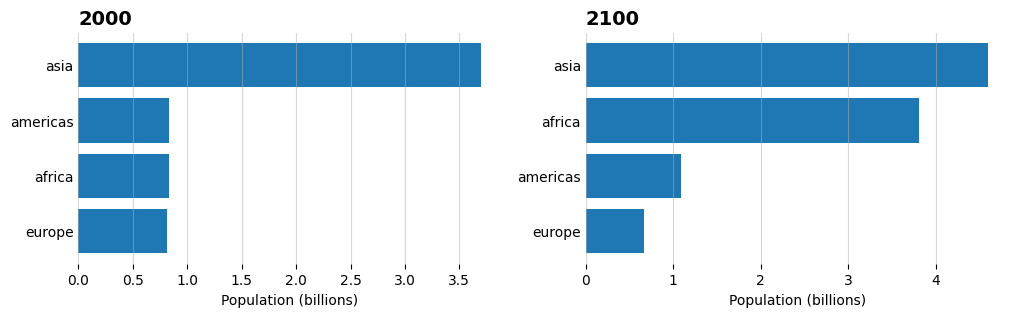

In [49]:
fig, ax = plt.subplots(1,2, figsize=(12,3))

ax[0].barh(df_2000['region'], df_2000['pop_billions'])
ax[0].set_title('2000', loc='left', fontsize=14, fontweight='bold')
pro_tip(ax[0])

ax[1].barh(df_2100['region'], df_2100['pop_billions'])
ax[1].set_title('2100', loc='left', fontsize=14, fontweight='bold')
pro_tip(ax[1])

In [65]:
def improved():
  plt.legend().set_visible(False)
  ax = plt.gca()
  ax.spines[['left', 'top', 'right']].set_visible(False)
  ax.tick_params(axis='y', length=0)
  plt.grid(axis='y', alpha=0.5)
  plt.tick_params(axis='y', length=0)

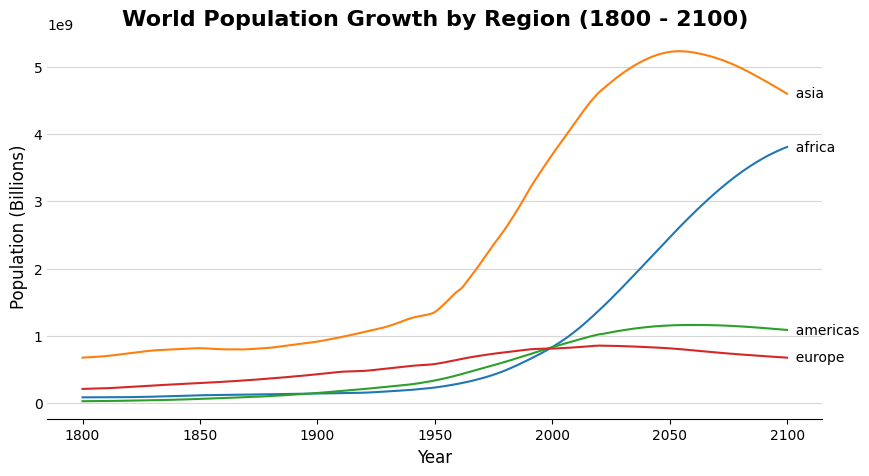

In [68]:
df_pivot.plot(kind= 'line', x= 'year', y= ['africa','asia','americas','europe'], figsize=(10,5))
plt.title('World Population Growth by Region (1800 - 2100)', fontsize= 16, fontweight= 'bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (Billions)', fontsize=12)
add_end_labels(df_pivot, df_pivot['year'].iloc[-1], ['africa','asia','americas','europe'], alpha=1)
improved()